# Vaishnavi Joshi

# Task3:Prediction Using Unsupervised Machine Learning
**Objective**:To predict optimum number of clusters from 'iris' dataset and to represent it visually

Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
iris= datasets.load_iris()
iris_d=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
#data discription
iris_d.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data Visualization

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


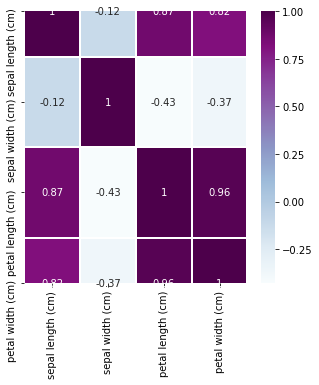

In [5]:
#correlationmatrix
corrmatrix=iris_d.corr()
print(corrmatrix)
fig=plt.figure(figsize=(5,5))
sn.heatmap(corrmatrix,annot=True,cmap="BuPu",linewidth=1)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

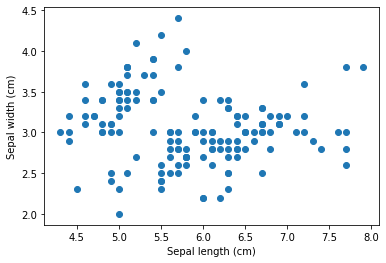

In [6]:
#Scatter plot
plt.scatter(x='sepal length (cm)',y='sepal width (cm)',data=iris_d)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

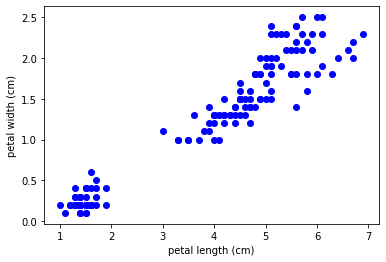

In [7]:
#Scatter plot
plt.scatter(x='petal length (cm)',y='petal width (cm)',data=iris_d,color='b')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show

Finding K using Elbow method

In [8]:
WCSS=[]
k_range=10
for i in range (1, k_range):
    k=KMeans(i)
    k.fit(iris_d)
    W=k.inertia_
    WCSS.append(W)
WCSS    

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.255523809523815,
 46.44618205128205,
 39.066035353535355,
 34.3058152958153,
 30.06459307359308,
 28.32799963924964]

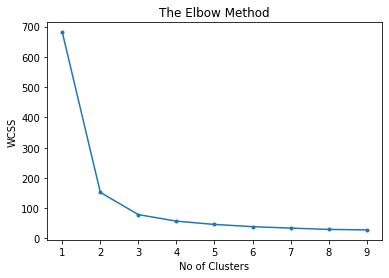

In [9]:
cluster=range(1,k_range)
plt.plot(cluster,WCSS,marker='.')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

From the above plot we can run K-Means using 3 clusters

k-means clustering

In [10]:
kmeans=KMeans(3)
kmeans.fit(iris_d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
centers=kmeans.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [12]:
iris_pred=iris_d.copy()
iris_pred['predicted']=kmeans.fit_predict(iris_d)
iris_pred.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


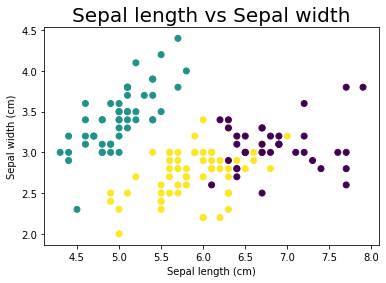

In [13]:
plt.scatter(x='sepal length (cm)',y='sepal width (cm)',data=iris_pred,c='predicted')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal length vs Sepal width',fontsize=20)
plt.show()

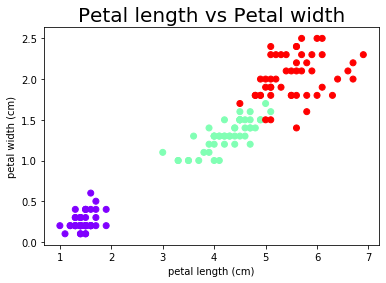

In [14]:
plt.scatter(x='petal length (cm)',y='petal width (cm)',data=iris_d,c=iris.target,cmap='rainbow')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal length vs Petal width',fontsize=20)
plt.show()

**Thankyou!**